# CNN_MNIST

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
batch_size = 128
num_classes = 10
epochs = 12


In [0]:
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## 2 convolution layers + (3,3) kernel

In [0]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,  validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.1557 - acc: 0.9529 - val_loss: 0.0580 - val_acc: 0.9821
Epoch 2/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0696 - acc: 0.9801 - val_loss: 0.0348 - val_acc: 0.9884
Epoch 3/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0552 - acc: 0.9838 - val_loss: 0.0375 - val_acc: 0.9888
Epoch 4/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0446 - acc: 0.9873 - val_loss: 0.0355 - val_acc: 0.9901
Epoch 5/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0385 - acc: 0.9887 - val_loss: 0.0373 - val_acc: 0.9899
Epoch 6/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0351 - acc: 0.9899 - val_loss: 0.0422 - val_acc: 0.9895
Epoch 7/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0330 - acc: 0.9908 - val_loss: 0.0309 - 

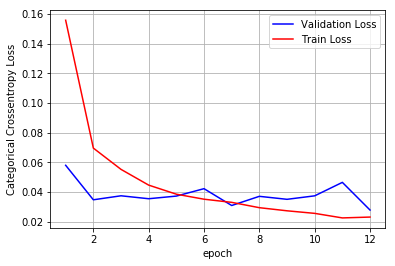

In [0]:
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy, ty, ax)

## 3 convolution layer + (5,5) kernel

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5),activation='relu',input_shape=input_shape, padding='same', kernel_initializer='he_normal'))
model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 24, 24, 32)        51232     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)              

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,  validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 442s 7ms/step - loss: 0.4140 - acc: 0.8737 - val_loss: 0.0544 - val_acc: 0.9828
Epoch 2/12
60000/60000 [==============================] - 439s 7ms/step - loss: 0.1123 - acc: 0.9657 - val_loss: 0.0556 - val_acc: 0.9812
Epoch 3/12
60000/60000 [==============================] - 439s 7ms/step - loss: 0.0855 - acc: 0.9742 - val_loss: 0.0295 - val_acc: 0.9908
Epoch 4/12
60000/60000 [==============================] - 438s 7ms/step - loss: 0.0689 - acc: 0.9792 - val_loss: 0.0247 - val_acc: 0.9919
Epoch 5/12
60000/60000 [==============================] - 440s 7ms/step - loss: 0.0580 - acc: 0.9829 - val_loss: 0.0233 - val_acc: 0.9927
Epoch 6/12
60000/60000 [==============================] - 439s 7ms/step - loss: 0.0506 - acc: 0.9842 - val_loss: 0.0234 - val_acc: 0.9922
Epoch 7/12
60000/60000 [==============================] - 439s 7ms/step - loss: 0.0480 - acc: 0.9848 - val_loss: 0.0224 - 

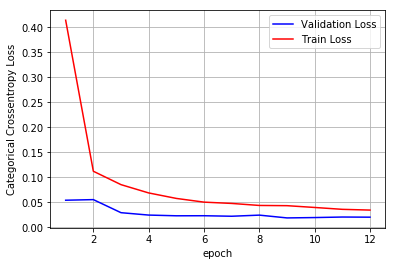

In [0]:
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy, ty, ax)

## 5 convolution layer + 3*3 kernel + BN + Dropout

In [0]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape, padding='same', kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 16)        9232      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 9, 9, 32)          4640      
_________________________________________________________________
dropout_8 (Dropout)          (None, 9, 9, 32)          0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 9, 9, 32)         

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,  validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 330s 6ms/step - loss: 0.9857 - acc: 0.6956 - val_loss: 0.1360 - val_acc: 0.9577
Epoch 2/12
60000/60000 [==============================] - 328s 5ms/step - loss: 0.2575 - acc: 0.9264 - val_loss: 0.0773 - val_acc: 0.9738
Epoch 3/12
60000/60000 [==============================] - 323s 5ms/step - loss: 0.1631 - acc: 0.9538 - val_loss: 0.0542 - val_acc: 0.9830
Epoch 4/12
60000/60000 [==============================] - 317s 5ms/step - loss: 0.1245 - acc: 0.9656 - val_loss: 0.0412 - val_acc: 0.9874
Epoch 5/12
60000/60000 [==============================] - 319s 5ms/step - loss: 0.1076 - acc: 0.9697 - val_loss: 0.0414 - val_acc: 0.9870
Epoch 6/12
60000/60000 [==============================] - 317s 5ms/step - loss: 0.0936 - acc: 0.9731 - val_loss: 0.0352 - val_acc: 0.9892
Epoch 7/12
60000/60000 [===

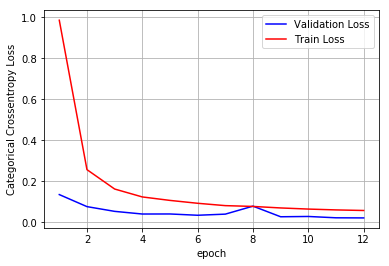

In [0]:
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy, ty, ax)

## 7 convolution layer + (3,3) kernel + (2,2) kernel + 2 max pool layer



In [0]:
model1= Sequential()
model1.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape,padding = "same", kernel_initializer='he_normal'))
model1.add(Conv2D(64, (3, 3), activation='relu',padding = "same", kernel_initializer='he_normal'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(32, (2, 2), activation='relu', kernel_initializer='he_normal'))
model1.add(Conv2D(32, (2, 2), activation='relu', kernel_initializer='he_normal'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(16, (2, 2), activation='relu', kernel_initializer='he_normal'))
model1.add(Conv2D(16, (2, 2), activation='relu', kernel_initializer='he_normal'))
model1.add(Conv2D(16, (2, 2), activation='relu', kernel_initializer='he_normal'))
model1.add(Flatten())
model1.add(Dense(64, activation='relu', kernel_initializer='he_normal'))

model1.add(Dense(num_classes, activation='softmax'))
model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 13, 13, 32)        8224      
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 12, 12, 32)        4128      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 5, 5, 16)         

In [0]:
model1.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

hist = model1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,  validation_data=(x_test, y_test))

score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 353s 6ms/step - loss: 0.2489 - acc: 0.9201 - val_loss: 0.1111 - val_acc: 0.9665
Epoch 2/12
60000/60000 [==============================] - 352s 6ms/step - loss: 0.0725 - acc: 0.9777 - val_loss: 0.0495 - val_acc: 0.9855
Epoch 3/12
60000/60000 [==============================] - 345s 6ms/step - loss: 0.0520 - acc: 0.9841 - val_loss: 0.0550 - val_acc: 0.9836
Epoch 4/12
60000/60000 [==============================] - 342s 6ms/step - loss: 0.0417 - acc: 0.9871 - val_loss: 0.0421 - val_acc: 0.9868
Epoch 5/12
60000/60000 [==============================] - 343s 6ms/step - loss: 0.0384 - acc: 0.9877 - val_loss: 0.0348 - val_acc: 0.9901
Epoch 6/12
60000/60000 [==============================] - 339s 6ms/step - loss: 0.0311 - acc: 0.9900 - val_loss: 0.0359 - val_acc: 0.9890
Epoch 7/12
60000/60000 [==============================] - 338s 6ms/step - loss: 0.0279 - acc: 0.9911 - val_loss: 0.0327 - 

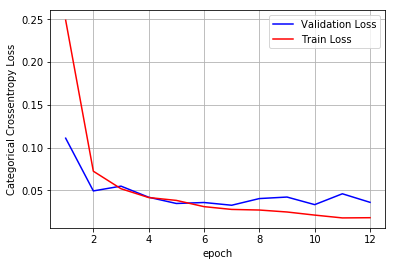

In [0]:
x = list(range(1,epochs+1))
vy = hist.history['val_loss']
ty = hist.history['loss']
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy, ty, ax)

In [0]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = [" # convolution layers","# max pool layers", "kernel size", "Score", "Accuracy"]

x.add_row([2,1 ,"3*3", 0.027, 0.9925 ])
x.add_row([3,2 ,"5*5", 0.020, 0.9938 ])
x.add_row([5,1 ,"3*3", 0.022, 0.9928 ])
x.add_row([7,2 ,"2*2, 3*3", 0.036, 0.9898 ]) # no batch normalization and no dropout


     
print(x)

+-----------------------+-------------------+-------------+-------+----------+
|  # convolution layers | # max pool layers | kernel size | Score | Accuracy |
+-----------------------+-------------------+-------------+-------+----------+
|           2           |         1         |     3*3     | 0.027 |  0.9925  |
|           3           |         2         |     5*5     |  0.02 |  0.9938  |
|           5           |         1         |     3*3     | 0.022 |  0.9928  |
|           7           |         2         |   2*2, 3*3  | 0.036 |  0.9898  |
+-----------------------+-------------------+-------------+-------+----------+


# CONCLUSION:

1. Used different convolution and max pooling layers in different architecture.
2. Tried with and without dropout and batch-normalization.
3. Tried with and without weight initialization.
4.  2nd architecture with 3 convolution layers and 2 max pool layers produced the best result.